In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages('VGAM')

In [ ]:
%%R
install.packages('tidyverse')

In [ ]:
%%R
library(VGAM)
library(tidyverse)
lake <- c('han', 'okl', 'tra', 'geo')
size <- c('<=2.3', '>2.3')
d_2a <- expand.grid(size=size, lake=lake)
fish <- c(23,7,5,13,5,8,16,17)
inve <- c(4,0,11,8,11,7,19,1)
rept <- c(2,1,1,6,2,6,1,0)
bird <- c(2,3,0,1,1,3,2,1)
othr <- c(8,5,3,0,5,5,3,3)
dat_2a <- cbind(d_2a, fish, inve, rept, bird, othr) %>% as.data.frame()
#dat_2a$size <- as.character(dat_2a$size)
#dat_2a$lake <- as.character(dat_2a$lake)



In [ ]:
%%R
mod_2a <- vglm( cbind(fish, inve, rept, bird, othr) ~ size + lake, 
                family=multinomial, data=dat_2a)
summary(mod_2a)


Call:
vglm(formula = cbind(fish, inve, rept, bird, othr) ~ size + lake, 
    family = multinomial, data = dat_2a)

Coefficients: 
              Estimate Std. Error z value Pr(>|z|)    
(Intercept):1   0.7465     0.3520   2.121 0.033928 *  
(Intercept):2  -1.0026     0.5803  -1.728 0.084023 .  
(Intercept):3  -1.6765     0.6799  -2.466 0.013671 *  
(Intercept):4  -1.2821     0.5996  -2.138 0.032507 *  
size>2.3:1      0.3316     0.4482   0.740 0.459506    
size>2.3:2     -1.1267     0.5049  -2.231 0.025655 *  
size>2.3:3      0.6828     0.6514   1.048 0.294542    
size>2.3:4      0.9622     0.7127   1.350 0.176990    
lakeokl:1       0.8205     0.7296   1.125 0.260713    
lakeokl:2       3.4161     0.8743   3.907 9.33e-05 ***
lakeokl:3       2.0366     0.9764   2.086 0.036984 *  
lakeokl:4      -0.5278     1.3019  -0.405 0.685178    
laketra:1      -0.6902     0.5597  -1.233 0.217511    
laketra:2       2.0902     0.7184   2.910 0.003620 ** 
laketra:3       1.0023     0.8297   1.208 0.

In [ ]:
%%R
VGAM::coef(mod_2a, matrix=TRUE) %>% round(3)

            log(mu[,1]/mu[,5]) log(mu[,2]/mu[,5]) log(mu[,3]/mu[,5])
(Intercept)              0.747             -1.003             -1.676
size>2.3                 0.332             -1.127              0.683
lakeokl                  0.821              3.416              2.037
laketra                 -0.690              2.090              1.002
lakegeo                  0.826              2.485             -0.417
            log(mu[,4]/mu[,5])
(Intercept)             -1.282
size>2.3                 0.962
lakeokl                 -0.528
laketra                 -0.298
lakegeo                  0.131


In [ ]:
%%R
exp(0.747+0.332+0.821)/(1 + exp(0.747+0.332+0.821) + exp(-1.003-1.127+3.416) + exp(-1.676+0.683+2.037) + exp(-1.282+0.962-0.528))

[1] 0.4587862


In [ ]:
%%R
exp(0.747+0.821)/(1 + exp(0.747+0.821) + exp(-1.003+3.416) + exp(-1.676+2.037) + exp(-1.282-0.528))

[1] 0.2584214


In [ ]:
%%R
exp(0.747)/(1 + exp(0.747) + exp(-1.003) + exp(-1.676) + exp(-1.282))

[1] 0.5354231


In [ ]:
%%R
exp(-1.282-0.962)

[1] 0.1060335


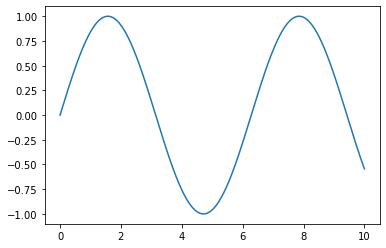

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x));

plt.show()

In [ ]:
%%R
data.frame(dat_2a$size, dat_2a$lake, round(fitted(mod_2a),3)) 

  dat_2a.size dat_2a.lake  fish  inve  rept  bird  othr
1       <=2.3         han 0.535 0.093 0.047 0.070 0.254
2        >2.3         han 0.570 0.023 0.072 0.141 0.194
3       <=2.3         okl 0.258 0.602 0.077 0.009 0.054
4        >2.3         okl 0.458 0.249 0.195 0.029 0.069
5       <=2.3         tra 0.184 0.517 0.089 0.036 0.174
6        >2.3         tra 0.296 0.193 0.202 0.108 0.201
7       <=2.3         geo 0.452 0.413 0.012 0.030 0.094
8        >2.3         geo 0.657 0.140 0.024 0.081 0.098


In [ ]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl
!pip3 install torchvision

ERROR: torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl is not a supported wheel on this platform.


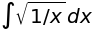

In [ ]:
from sympy import Integral, sqrt, symbols, init_printing

init_printing()

x = symbols('x')

Integral(sqrt(1 / x), x)

In [ ]:
%%R
library(tidyverse)
library(psych)
dat_loan <- read.table('loan.txt', header=T)

In [ ]:
%%R
des <- psych::describe(dat_loan)

In [ ]:
%%R
c(1:10) |> sum()

[1] 55


In [ ]:
%%R
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas/liblapack.so.3

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] forcats_0.5.1   stringr_1.4.0   dplyr_1.0.7     purrr_0.3.4    
[5] readr_2.1.1     tidyr_1.1.4     tibble_3.1.6    ggplot2_3.3.5  
[9] tidyverse_1.3.1

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.7       cellranger_1.1.0 pillar_1.6.4     

In [ ]:
%%shell
jupyter nbconvert --to html /content/Untitled9.ipynb

[NbConvertApp] Converting notebook /content/Untitled9.ipynb to html
[NbConvertApp] Writing 302251 bytes to /content/Untitled9.html


In [ ]:
%%R
## 3.a. ----
ther <- c('seq', 'alt')
gndr <- c('m', 'f')
d_3a <- expand.grid(gndr=gndr, ther=ther)
ProDis <- c(28,4,41,12)
NoChng <- c(45,12,44,7)
ParRem <- c(29,5,20,3)
ComRem <- c(26,2,20,1)
dat_3a <- cbind(d_3a, ProDis, NoChng, ParRem, ComRem ) %>% as.data.frame()

mod_3a <- vglm(cbind(ProDis, NoChng, ParRem, ComRem) ~ ther + gndr,
               family=cumulative(parallel=TRUE), data=dat_3a)
summary(mod_3a)


Call:
vglm(formula = cbind(ProDis, NoChng, ParRem, ComRem) ~ ther + 
    gndr, family = cumulative(parallel = TRUE), data = dat_3a)

Coefficients: 
              Estimate Std. Error z value Pr(>|z|)    
(Intercept):1  -1.3180     0.1801  -7.319  2.5e-13 ***
(Intercept):2   0.2492     0.1621   1.538  0.12412    
(Intercept):3   1.3001     0.1852   7.021  2.2e-12 ***
theralt         0.5807     0.2119   2.741  0.00613 ** 
gndrf           0.5414     0.2953   1.834  0.06671 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Names of linear predictors: logitlink(P[Y<=1]), logitlink(P[Y<=2]), 
logitlink(P[Y<=3])

Residual deviance: 5.5677 on 7 degrees of freedom

Log-likelihood: -25.5417 on 7 degrees of freedom

Number of Fisher scoring iterations: 5 

No Hauck-Donner effect found in any of the estimates


Exponentiated coefficients:
 theralt    gndrf 
1.787262 1.718403 


In [ ]:
%%R
data.frame(ther=dat_3a$ther, gndr=dat_3a$gndr, round(fitted(mod_3a),3) )

  ther gndr ProDis NoChng ParRem ComRem
1  seq    m  0.211  0.351  0.224  0.214
2  seq    f  0.315  0.373  0.175  0.137
3  alt    m  0.324  0.373  0.171  0.132
4  alt    f  0.451  0.346  0.121  0.082


In [ ]:
%%R
Polviews <- read.table("http://www.stat.ufl.edu/~aa/cat/data/Polviews.dat",header=TRUE)
Polviews
fit <- vglm(cbind(y1,y2,y3,y4,y5) ~ party + gender,family=cumulative(parallel=TRUE), data=Polviews)
summary(fit)


Call:
vglm(formula = cbind(y1, y2, y3, y4, y5) ~ party + gender, family = cumulative(parallel = TRUE), 
    data = Polviews)

Coefficients: 
              Estimate Std. Error z value Pr(>|z|)    
(Intercept):1 -2.12233    0.16875 -12.577   <2e-16 ***
(Intercept):2  0.16892    0.11481   1.471    0.141    
(Intercept):3  1.85716    0.15103  12.297   <2e-16 ***
(Intercept):4  4.65005    0.23496  19.791   <2e-16 ***
partyrepub    -3.63366    0.21785 -16.680   <2e-16 ***
gendermale     0.04731    0.14955   0.316    0.752    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Names of linear predictors: logitlink(P[Y<=1]), logitlink(P[Y<=2]), 
logitlink(P[Y<=3]), logitlink(P[Y<=4])

Residual deviance: 9.8072 on 10 degrees of freedom

Log-likelihood: -35.2032 on 10 degrees of freedom

Number of Fisher scoring iterations: 4 

No Hauck-Donner effect found in any of the estimates


Exponentiated coefficients:
partyrepub gendermale 
0.02641936 1.04844945 


In [ ]:
%%R
mod_3b <- vglm(cbind(ProDis, NoChng, ParRem, ComRem) ~ ther*gndr,
               family=cumulative(parallel=TRUE), data=dat_3a)

summary(mod_3b)


Call:
vglm(formula = cbind(ProDis, NoChng, ParRem, ComRem) ~ ther * 
    gndr, family = cumulative(parallel = TRUE), data = dat_3a)

Coefficients: 
              Estimate Std. Error z value Pr(>|z|)    
(Intercept):1  -1.2757     0.1843  -6.920 4.52e-12 ***
(Intercept):2   0.2957     0.1681   1.760   0.0785 .  
(Intercept):3   1.3452     0.1909   7.045 1.85e-12 ***
theralt         0.4881     0.2288   2.133   0.0329 *  
gndrf           0.2742     0.4094   0.670   0.5030    
theralt:gndrf   0.5904     0.5935   0.995   0.3199    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Names of linear predictors: logitlink(P[Y<=1]), logitlink(P[Y<=2]), 
logitlink(P[Y<=3])

Residual deviance: 4.5209 on 6 degrees of freedom

Log-likelihood: -25.0183 on 6 degrees of freedom

Number of Fisher scoring iterations: 5 

No Hauck-Donner effect found in any of the estimates


Exponentiated coefficients:
      theralt         gndrf theralt:gndrf 
     1.629170      1.315475      1.804727